## Spam_sms using various possible ML models

In [1]:
# Importing necessary libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, precision_recall_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from wordcloud import WordCloud
from collections import Counter

In [2]:
# Loading and inspecting the dataset
df = pd.read_csv('spam.csv', encoding='latin1')

In [3]:
print("Initial Dataset:")
df.head()

Initial Dataset:


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# Dropping unnecessary columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [5]:
print("Dataset after dropping unnecessary columns:")
df.head()

Dataset after dropping unnecessary columns:


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# Renaming columns for clarity
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [7]:
print("Dataset after renaming columns:")
df.head()

Dataset after renaming columns:


,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Encoding the target column
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [9]:
print("Dataset after encoding target column:")
df.head()

Dataset after encoding target column:


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# Feature engineering: adding new columns
df['num_characters'] = df['text'].apply(len)

In [11]:
print("Dataset after adding feature column 1:")
df.head()

Dataset after adding feature column 1:


,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [12]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [13]:
print("Dataset after adding feature column 2:")
df.head()

Dataset after adding feature column 2:


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [14]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [15]:
print("Dataset after adding feature column 3:")
df.head()

Dataset after adding feature column 3:


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [16]:
# The Dataset has been altered and is displayed in next cell

In [17]:
print("Dataset after adding feature columns:")
df.head()

Dataset after adding feature columns:


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


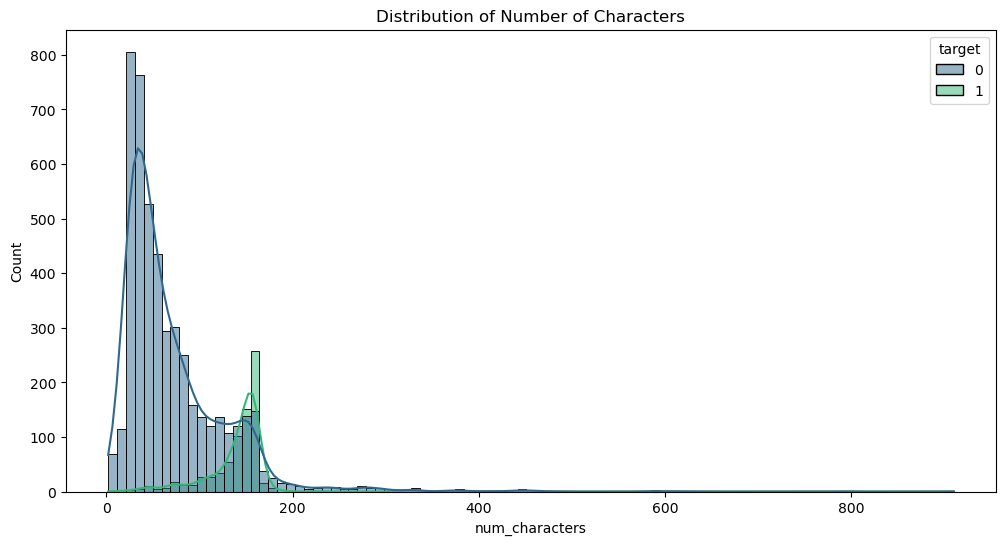

In [18]:
# Visualizing distributions
plt.figure(figsize=(12, 6))
sns.histplot(df, x='num_characters', hue='target', kde=True, palette='viridis')
plt.title('Distribution of Number of Characters')
plt.show()

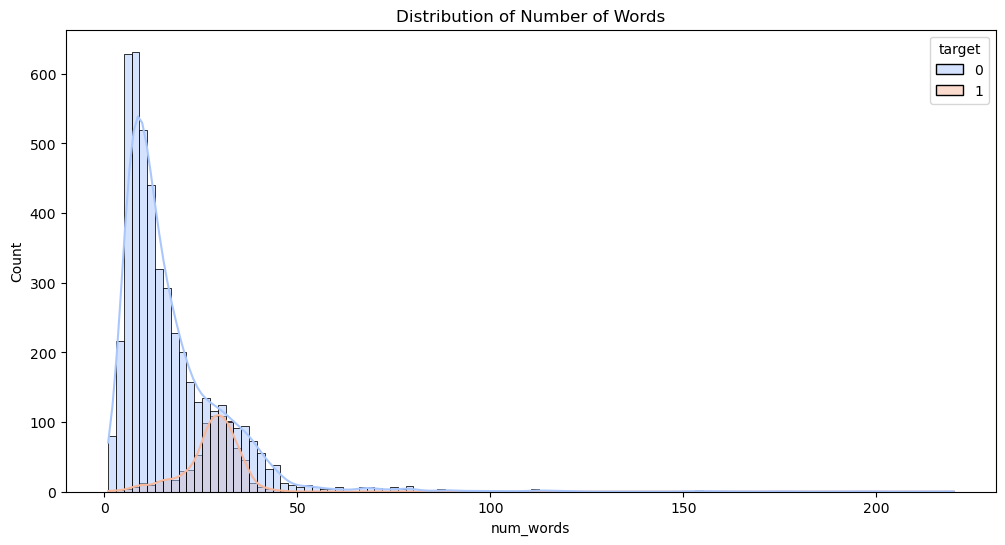

In [19]:
plt.figure(figsize=(12, 6))
sns.histplot(df, x='num_words', hue='target', kde=True, palette='coolwarm')
plt.title('Distribution of Number of Words')
plt.show()

In [20]:
# Text preprocessing and visualization
ps = PorterStemmer()

In [21]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [22]:
df['transformed_text'] = df['text'].apply(transform_text)

In [23]:
print("Dataset after text preprocessing:")
df.head()

Dataset after text preprocessing:


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [24]:
# Word Cloud visualization
def plot_word_cloud(text, title, color):
    wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white').generate(text)
    plt.figure(figsize=(15, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=14, color=color)
    plt.axis('off')
    plt.show()

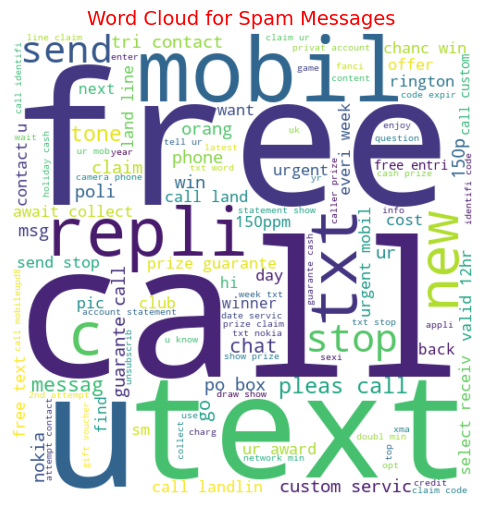

In [25]:
plot_word_cloud(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "), 'Word Cloud for Spam Messages', 'red')

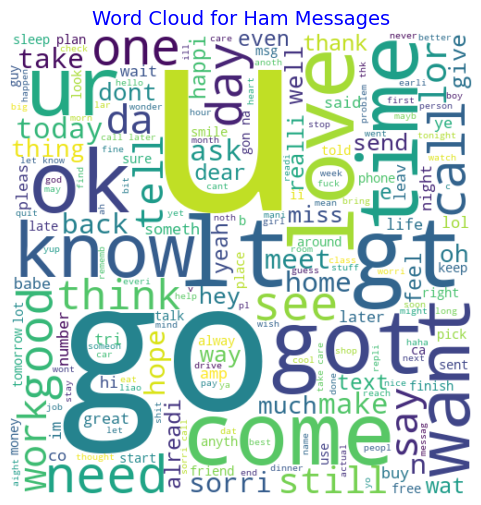

In [26]:
plot_word_cloud(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "), 'Word Cloud for Ham Messages', 'blue')

In [27]:
# Text Vectorization using TF-IDF
tfidf = TfidfVectorizer(max_features=3000)

In [28]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [29]:
print("Feature matrix after TF-IDF vectorization:")
pd.DataFrame(X).head()

Feature matrix after TF-IDF vectorization:


,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['target'].values, test_size=0.2, random_state=2)

In [31]:
# Model training and evaluation

In [32]:
# GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [33]:
y_pred_gnb = gnb.predict(X_test)

In [34]:
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"GaussianNB Accuracy: {accuracy_gnb}")

GaussianNB Accuracy: 0.8672645739910314


In [35]:
precision_gnb = precision_score(y_test, y_pred_gnb)
print(f"GaussianNB Precision: {precision_gnb}")

GaussianNB Precision: 0.5206611570247934


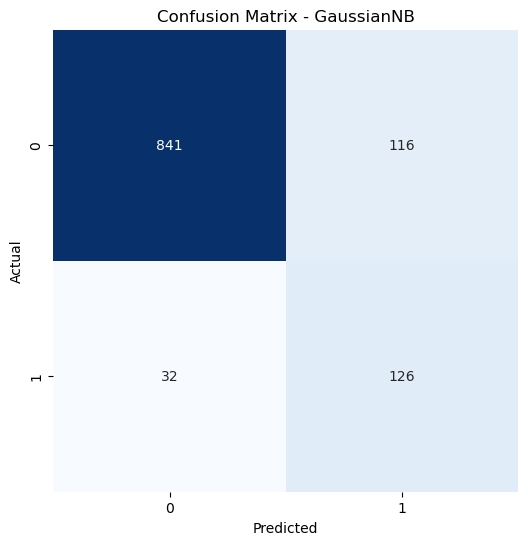

In [36]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_gnb), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - GaussianNB')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [37]:
# MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [38]:
y_pred_mnb = mnb.predict(X_test)

In [39]:
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
print(f"MultinomialNB Accuracy: {accuracy_mnb}")

MultinomialNB Accuracy: 0.9650224215246637


In [40]:
precision_mnb = precision_score(y_test, y_pred_mnb)
print(f"MultinomialNB Precision: {precision_mnb}")

MultinomialNB Precision: 0.9917355371900827


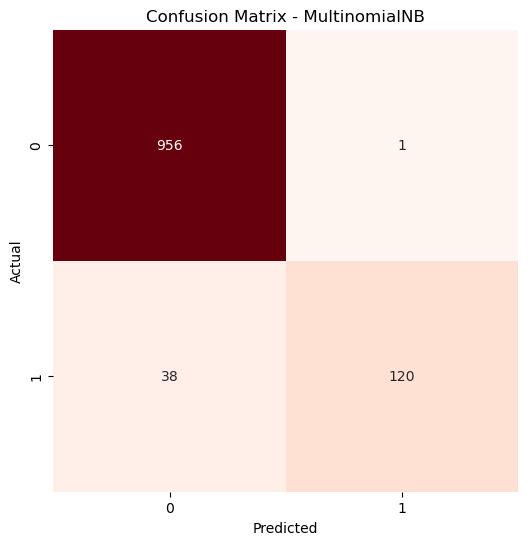

In [41]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_mnb), annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix - MultinomialNB')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [42]:
# BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

BernoulliNB()

In [43]:
y_pred_bnb = bnb.predict(X_test)

In [44]:
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)
print(f"BernoulliNB Accuracy: {accuracy_bnb}")

BernoulliNB Accuracy: 0.9748878923766816


In [45]:
precision_bnb = precision_score(y_test, y_pred_bnb)
print(f"BernoulliNB Precision: {precision_bnb}")

BernoulliNB Precision: 0.9850746268656716


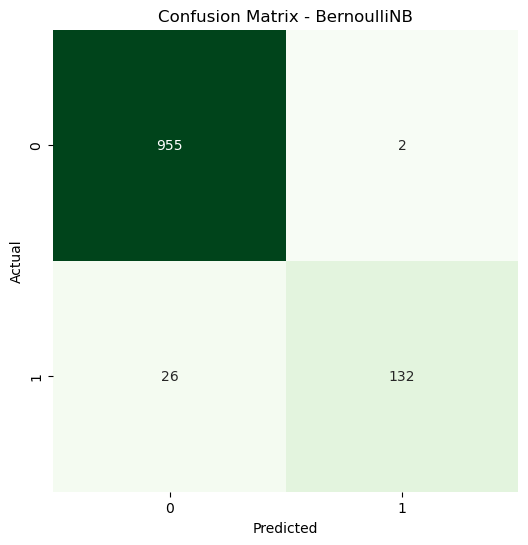

In [46]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_bnb), annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix - BernoulliNB')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [47]:
# SVC
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
svc.fit(X_train, y_train)

SVC(gamma=1.0, kernel='sigmoid', probability=True)

In [48]:
y_pred_svc = svc.predict(X_test)

In [49]:
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVC Accuracy: {accuracy_svc}")

SVC Accuracy: 0.9713004484304932


In [50]:
precision_svc = precision_score(y_test, y_pred_svc)
print(f"SVC Precision: {precision_svc}")

SVC Precision: 0.9846153846153847


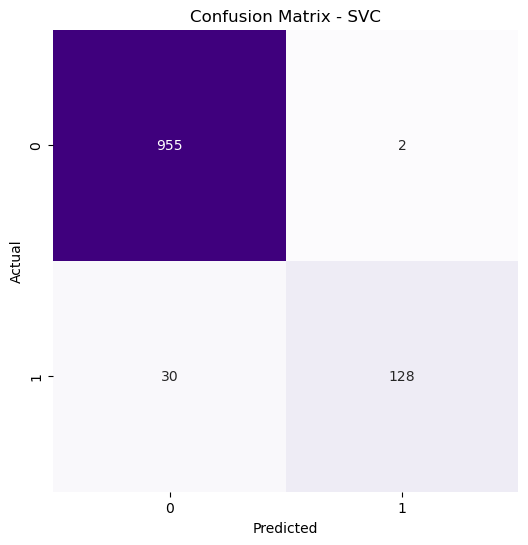

In [51]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('Confusion Matrix - SVC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [52]:
# LogisticRegression
lr = LogisticRegression(solver='liblinear', penalty='l1')
lr.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [53]:
y_pred_lr = lr.predict(X_test)

In [54]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"LogisticRegression Accuracy: {accuracy_lr}")

LogisticRegression Accuracy: 0.9515695067264573


In [55]:
precision_lr = precision_score(y_test, y_pred_lr)
print(f"LogisticRegression Precision: {precision_lr}")

LogisticRegression Precision: 0.9642857142857143


In [56]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_lr)

In [57]:
auc_score = auc(recall, precision)

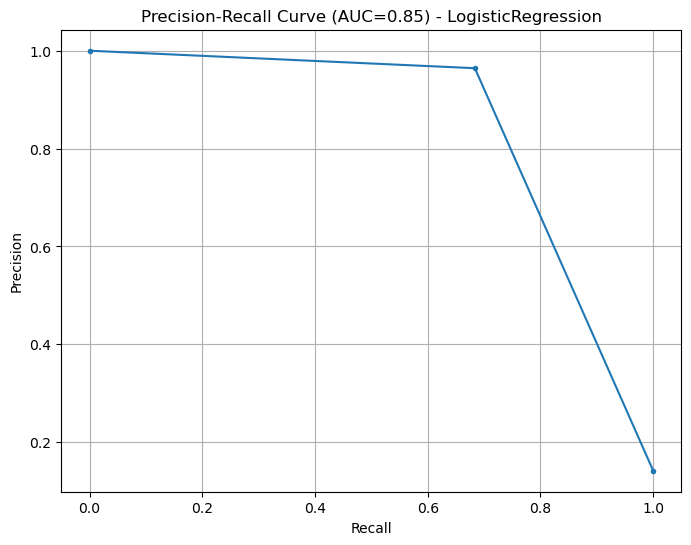

In [58]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AUC={auc_score:.2f}) - LogisticRegression')
plt.grid(True)
plt.show()

In [59]:
# RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=2)

In [60]:
y_pred_rfc = rfc.predict(X_test)

In [61]:
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print(f"RandomForest Accuracy: {accuracy_rfc}")

RandomForest Accuracy: 0.9659192825112107


In [62]:
precision_rfc = precision_score(y_test, y_pred_rfc)
print(f"RandomForest Precision: {precision_rfc}")

RandomForest Precision: 0.9838709677419355


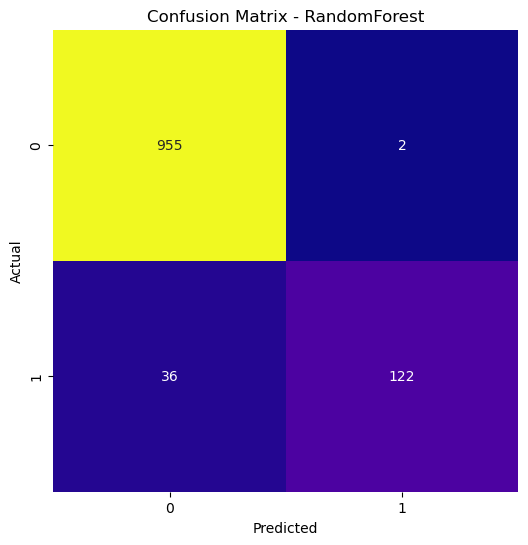

In [63]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rfc), annot=True, fmt='d', cmap='plasma', cbar=False)
plt.title('Confusion Matrix - RandomForest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [64]:
# AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50, random_state=2, algorithm='SAMME')
abc.fit(X_train, y_train)


AdaBoostClassifier(algorithm='SAMME', random_state=2)

In [65]:
y_pred_abc = abc.predict(X_test)

In [66]:
accuracy_abc = accuracy_score(y_test, y_pred_abc)
print(f"AdaBoost Accuracy: {accuracy_abc}")

AdaBoost Accuracy: 0.9112107623318386


In [67]:
precision_abc = precision_score(y_test, y_pred_abc)
print(f"AdaBoost Precision: {precision_abc}")

AdaBoost Precision: 0.8933333333333333


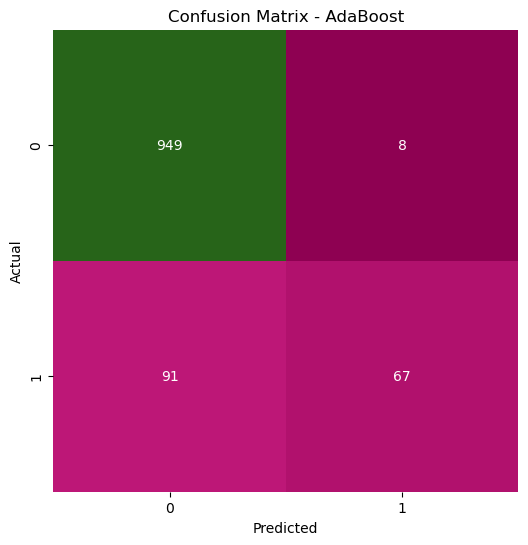

In [68]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_abc), annot=True, fmt='d', cmap='PiYG', cbar=False)
plt.title('Confusion Matrix - AdaBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [69]:
# ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
etc.fit(X_train, y_train)

ExtraTreesClassifier(n_estimators=50, random_state=2)

In [70]:
y_pred_etc = etc.predict(X_test)

In [71]:
accuracy_etc = accuracy_score(y_test, y_pred_etc)
print(f"ExtraTrees Accuracy: {accuracy_etc}")

ExtraTrees Accuracy: 0.9713004484304932


In [72]:
precision_etc = precision_score(y_test, y_pred_etc)
print(f"ExtraTrees Precision: {precision_etc}")

ExtraTrees Precision: 0.9921875


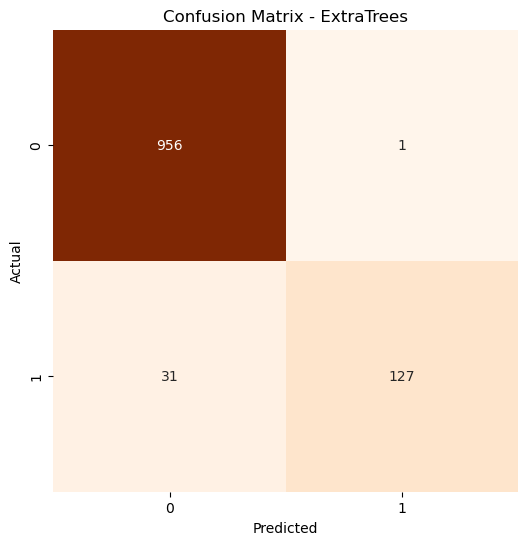

In [73]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_etc), annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Confusion Matrix - ExtraTrees')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [74]:
# GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50, random_state=2)

In [75]:
y_pred_gbc = gbc.predict(X_test)

In [76]:
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
print(f"GradientBoosting Accuracy: {accuracy_gbc}")

GradientBoosting Accuracy: 0.9363228699551569


In [77]:
precision_gbc = precision_score(y_test, y_pred_gbc)
print(f"GradientBoosting Precision: {precision_gbc}")

GradientBoosting Precision: 0.9306930693069307


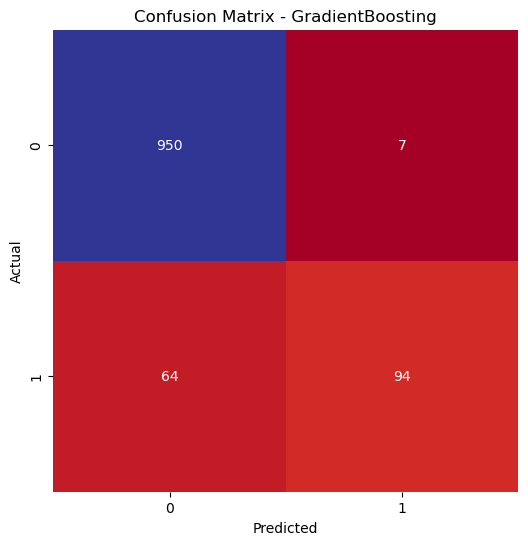

In [78]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_gbc), annot=True, fmt='d', cmap='RdYlBu', cbar=False)
plt.title('Confusion Matrix - GradientBoosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [79]:
# XGBoost
xgb = XGBClassifier(n_estimators=50, random_state=2)
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=2, ...)

In [80]:
y_pred_xgb = xgb.predict(X_test)

In [81]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")

XGBoost Accuracy: 0.9614349775784753


In [82]:
precision_xgb = precision_score(y_test, y_pred_xgb)
print(f"XGBoost Precision: {precision_xgb}")

XGBoost Precision: 0.967479674796748


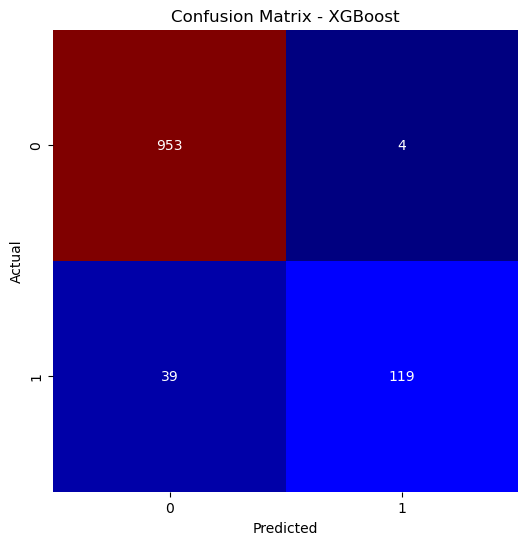

In [83]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='jet', cbar=False)
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [84]:
# Voting Classifier (Soft Voting)
voting = VotingClassifier(estimators=[('svc', svc), ('mnb', mnb), ('etc', etc)], voting='soft')
voting.fit(X_train, y_train)


VotingClassifier(estimators=[('svc',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('mnb', MultinomialNB()),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [85]:
y_pred_voting = voting.predict(X_test)

In [86]:
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"Voting Classifier Accuracy: {accuracy_voting}")

Voting Classifier Accuracy: 0.9775784753363229


In [87]:
precision_voting = precision_score(y_test, y_pred_voting)
print(f"Voting Classifier Precision: {precision_voting}")

Voting Classifier Precision: 1.0


In [88]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_voting)

In [89]:
auc_score = auc(recall, precision)

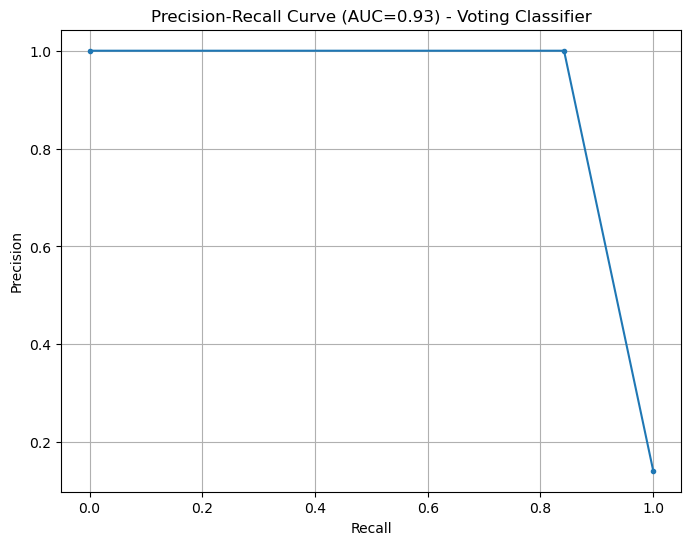

In [90]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AUC={auc_score:.2f}) - Voting Classifier')
plt.grid(True)
plt.show()

In [91]:
# Stacking Classifier
estimators = [('svc', svc), ('mnb', mnb), ('etc', etc)]

In [92]:
final_estimator = RandomForestClassifier()

In [93]:
stacking = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
stacking.fit(X_train, y_train)

StackingClassifier(estimators=[('svc',
                                SVC(gamma=1.0, kernel='sigmoid',
                                    probability=True)),
                               ('mnb', MultinomialNB()),
                               ('etc',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2))],
                   final_estimator=RandomForestClassifier())

In [94]:
y_pred_stacking = stacking.predict(X_test)

In [95]:
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"Stacking Classifier Accuracy: {accuracy_stacking}")

Stacking Classifier Accuracy: 0.9802690582959641


In [96]:
precision_stacking = precision_score(y_test, y_pred_stacking)
print(f"Stacking Classifier Precision: {precision_stacking}")

Stacking Classifier Precision: 0.9788732394366197


In [97]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_stacking)

In [98]:
auc_score = auc(recall, precision)

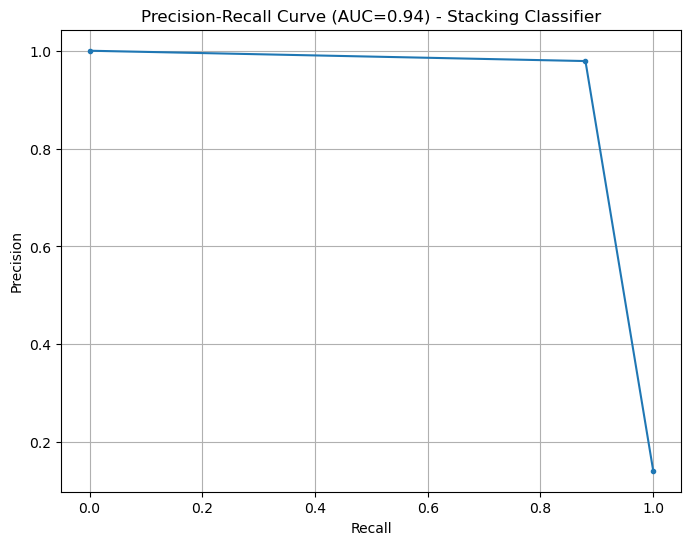

In [99]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AUC={auc_score:.2f}) - Stacking Classifier')
plt.grid(True)
plt.show()

In [100]:
# Plotting bar charts for accuracy and precision
accuracies = {
    "GaussianNB": accuracy_gnb,
    "MultinomialNB": accuracy_mnb,
    "BernoulliNB": accuracy_bnb,
    "SVC": accuracy_svc,
    "LogisticRegression": accuracy_lr,
    "RandomForest": accuracy_rfc,
    "AdaBoost": accuracy_abc,
    "ExtraTrees": accuracy_etc,
    "GradientBoosting": accuracy_gbc,
    "XGBoost": accuracy_xgb,
    "Voting": accuracy_voting,
    "Stacking": accuracy_stacking
}

In [101]:
precisions = {
    "GaussianNB": precision_gnb,
    "MultinomialNB": precision_mnb,
    "BernoulliNB": precision_bnb,
    "SVC": precision_svc,
    "LogisticRegression": precision_lr,
    "RandomForest": precision_rfc,
    "AdaBoost": precision_abc,
    "ExtraTrees": precision_etc,
    "GradientBoosting": precision_gbc,
    "XGBoost": precision_xgb,
    "Voting": precision_voting,
    "Stacking": precision_stacking
}

In [102]:
print("Accuracies:")
for model_name, accuracy in accuracies.items():
    print(f"{model_name}: {accuracy}")

Accuracies:
GaussianNB: 0.8672645739910314
MultinomialNB: 0.9650224215246637
BernoulliNB: 0.9748878923766816
SVC: 0.9713004484304932
LogisticRegression: 0.9515695067264573
RandomForest: 0.9659192825112107
AdaBoost: 0.9112107623318386
ExtraTrees: 0.9713004484304932
GradientBoosting: 0.9363228699551569
XGBoost: 0.9614349775784753
Voting: 0.9775784753363229
Stacking: 0.9802690582959641


In [103]:
print("Precisions:")
for model_name, precision in precisions.items():
    print(f"{model_name}: {precision}")

Precisions:
GaussianNB: 0.5206611570247934
MultinomialNB: 0.9917355371900827
BernoulliNB: 0.9850746268656716
SVC: 0.9846153846153847
LogisticRegression: 0.9642857142857143
RandomForest: 0.9838709677419355
AdaBoost: 0.8933333333333333
ExtraTrees: 0.9921875
GradientBoosting: 0.9306930693069307
XGBoost: 0.967479674796748
Voting: 1.0
Stacking: 0.9788732394366197


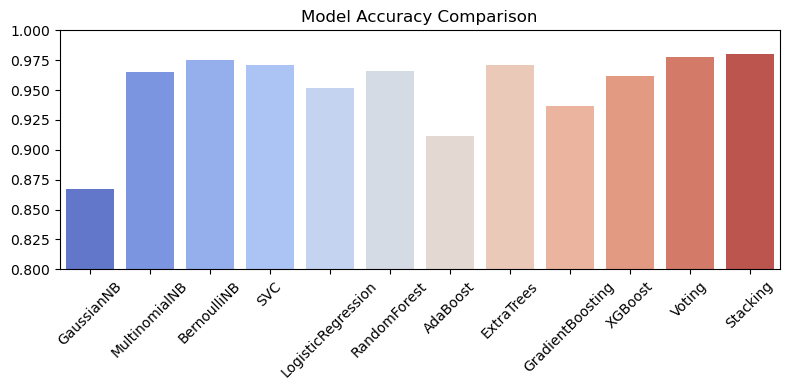

In [104]:
plt.figure(figsize=(8, 4))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='coolwarm', hue=list(accuracies.keys()))
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

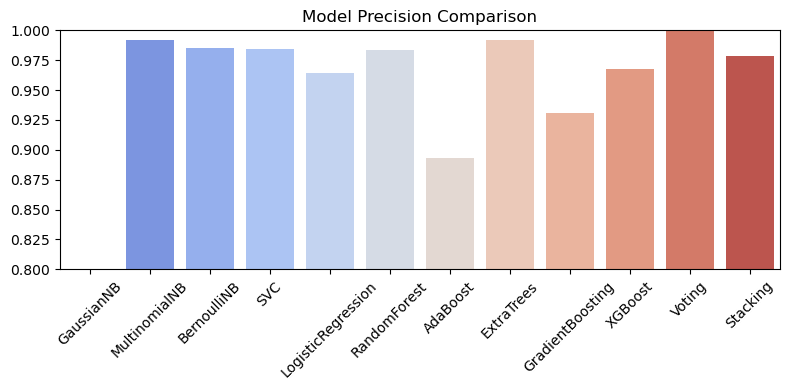

In [105]:
plt.figure(figsize=(8, 4))
sns.barplot(x=list(precisions.keys()), y=list(precisions.values()), palette='coolwarm', hue=list(precisions.keys()))
plt.title('Model Precision Comparison')
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()